In [1]:
import sys
sys.path.append("/Users/oruebel/Devel/nwb/arcontrol/ArControl-convert2-nwb")
import arcontrol2nwb
from ndx_beadl.plot import *
from matplotlib import pyplot as plt
%matplotlib inline

# Convert example data to NWB

In [2]:
arcfile = './2022-1113-224711.txt'
arcdata = arcontrol2nwb.convert(
    arc_data_filename=arcfile,
    # arc_taskprogram_filename=arcfile  # TODO: The example is missing the ARControl XML task program
)

# Read data from NWB

In [3]:
from pynwb import NWBHDF5IO

nwbfile = arcfile.replace('txt', 'nwb')
io = NWBHDF5IO(nwbfile, mode='r')
nwb = io.read()

# Basic visualizatons of the data in NWB

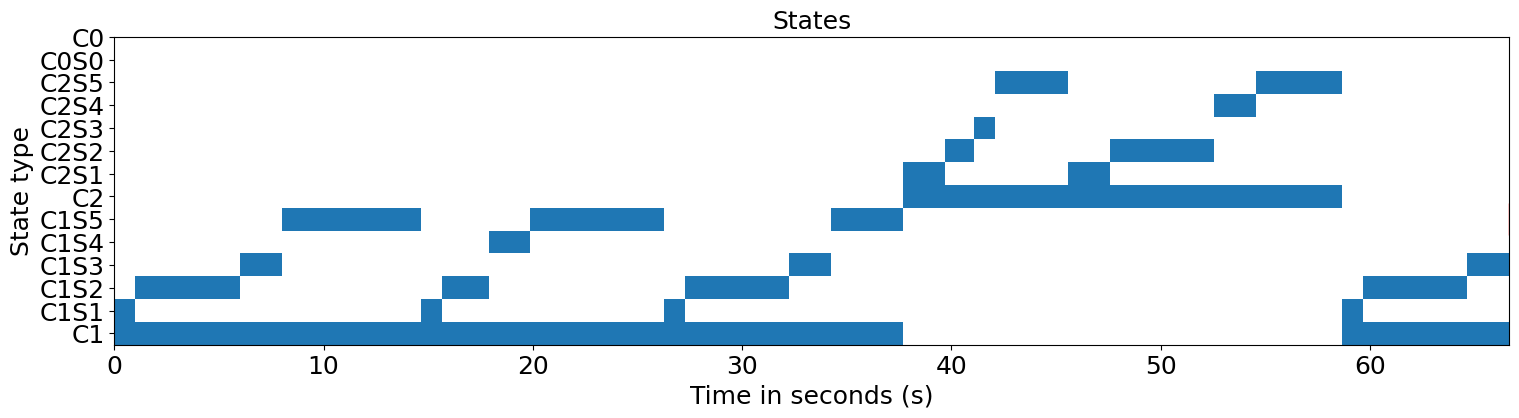

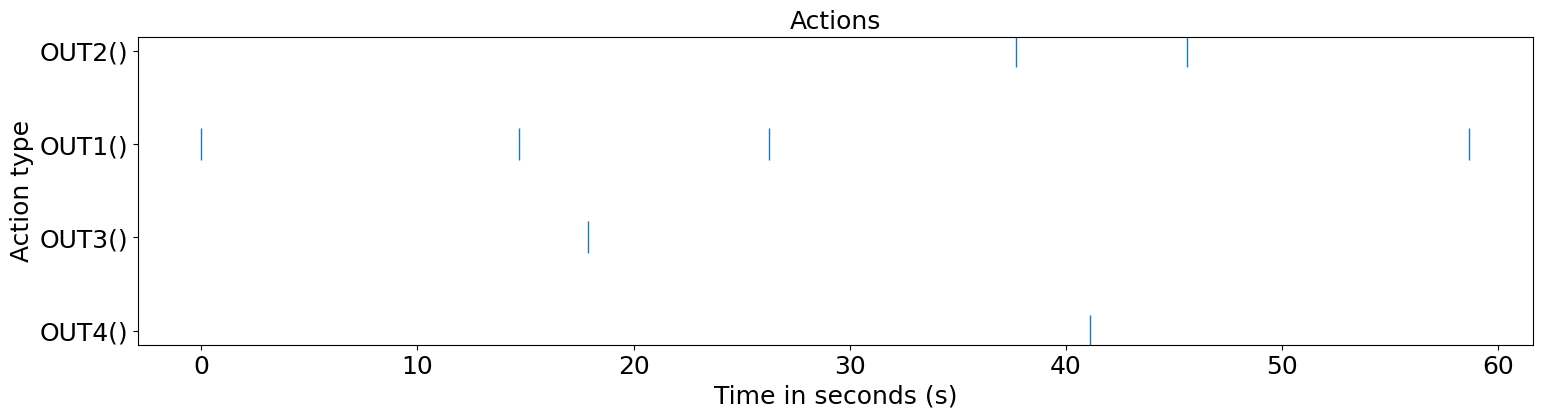

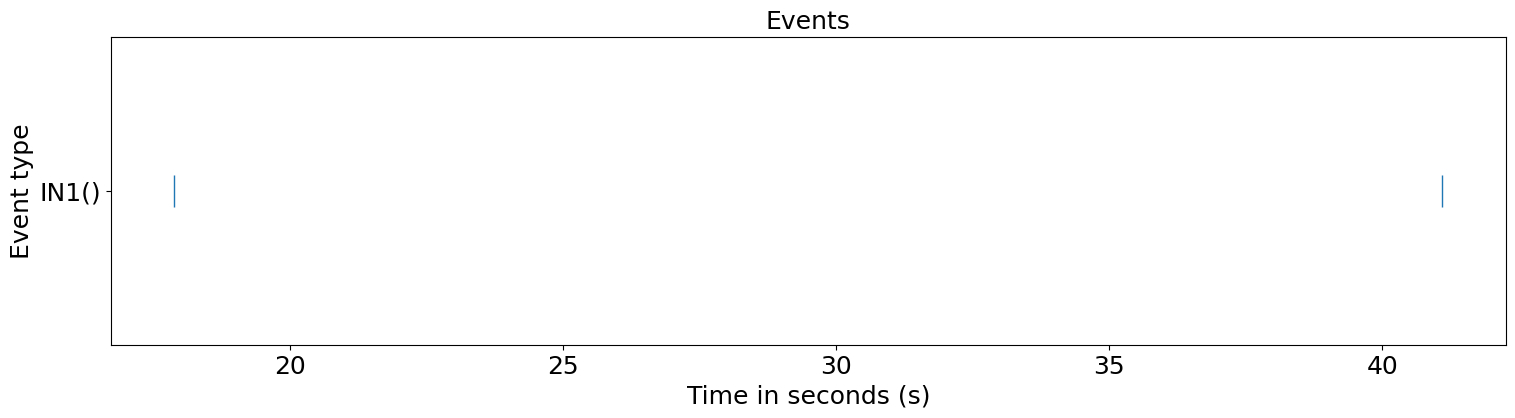

In [4]:
# Plot the events data
fig = plot_states(states=nwb.get_acquisition("states"),
                  state_types=nwb.get_lab_meta_data('task').state_types,
                  figsize=(18,4),
                  marker_size=500)
plt.title("States", fontsize=18)
plt.show()

# Plot the actions data
fig = plot_actions(actions=nwb.get_acquisition("actions"),
                   action_types=nwb.get_lab_meta_data('task').action_types,
                   show_action_values=True,
                   figsize=(18,4),
                   marker_size=500)
plt.title("Actions", fontsize=18)
plt.show()

# Plot the events data
fig = plot_events(events=nwb.get_acquisition("events"),
                  event_types=nwb.get_lab_meta_data('task').event_types,
                  show_event_values=True,
                  figsize=(18,4),
                  marker_size=500)
plt.title("Events", fontsize=18)
plt.show()


# Explore the file with NWBWidgets

In [5]:
from nwbwidgets import nwb2widget
nwb2widget(nwb)

# Print data parsed from the ARControl data file

In [6]:
import pprint
pprint.pprint(arcdata)

{'C1': array([[    0, 37681],
       [58668,  8000]]),
 'C1S1': array([[    0,  1002],
       [14682,  1000],
       [26261,  1000],
       [58668,  1000]]),
 'C1S2': array([[ 1002,  5000],
       [15682,  2205],
       [27261,  5000],
       [59668,  5000]]),
 'C1S3': array([[ 6002,  2000],
       [32261,  2000],
       [64668,  2000]]),
 'C1S4': array([[17887,  2000]]),
 'C1S5': array([[ 8002,  6680],
       [19887,  6374],
       [34261,  3420],
       [66668,     0]]),
 'C2': array([[37681, 20987]]),
 'C2S1': array([[37681,  2000],
       [45577,  2000]]),
 'C2S2': array([[39681,  1421],
       [47577,  5000]]),
 'C2S3': array([[41102,  1000]]),
 'C2S4': array([[52577,  2000]]),
 'C2S5': array([[42102,  3475],
       [54577,  4091]]),
 'IN1': [[17887, 1220], [41102, 1313]],
 'OUT1': [[0, 1002], [14682, 1000], [26261, 1000], [58668, 1000]],
 'OUT2': [[37681, 2000], [45577, 2000]],
 'OUT3': [[17887, 500]],
 'OUT4': [[41102, 1000]],
 'info': {'C0': 'End session',
          'C0S0': 'En

# Load a table form the NWB file

In [7]:
nwb.acquisition['states'].to_dataframe(index=True)

,start_time,stop_time,state_type
id,,,
0,0.000,1.002,1
1,14.682,15.682,1
2,26.261,27.261,1
3,58.668,59.668,1
4,1.002,6.002,2
5,15.682,17.887,2
6,27.261,32.261,2
7,59.668,64.668,2
8,6.002,8.002,3


For the StatesTable we can merge the definition of the references states by using ``to_hierarchical_dataframe`` instead. 

In [8]:
from hdmf.common.hierarchicaltable import to_hierarchical_dataframe
to_hierarchical_dataframe(nwb.acquisition['states']).reset_index()

source_table states                      state_types             \
label            id start_time stop_time          id state_name   
0                 0      0.000     1.002           1       C1S1   
1                 1     14.682    15.682           1       C1S1   
2                 2     26.261    27.261           1       C1S1   
3                 3     58.668    59.668           1       C1S1   
4                 4      1.002     6.002           2       C1S2   
5                 5     15.682    17.887           2       C1S2   
6                 6     27.261    32.261           2       C1S2   
7                 7     59.668    64.668           2       C1S2   
8                 8      6.002     8.002           3       C1S3   
9                 9     32.261    34.261           3       C1S3   
10               10     64.668    66.668           3       C1S3   
11               11      8.002    14.682           5       C1S5   
12               12     19.887    26.261           5       C1S5   
13               13     34.261    37.681           5       C1S5   
14               14     66.668    66.668           5       C1S5   
15               15     17.887    19.887           4       C1S4   
16               16     37.681    39.681           7       C2S1   
17               17     45.577    47.577           7       C2S1   
18               18     39.681    41.102           8       C2S2   
19               19     47.577    52.577           8       C2S2   
20               20     41.102    42.102           9       C2S3   
21               21     42.102    45.577          11       C2S5   
22               22     54.577    58.668          11       C2S5   
23               23     52.577    54.577          10       C2S4   
24               24      0.000    37.681           0         C1   
25               25     58.668    66.668           0         C1   
26               26     37.681    58.668           6         C2   

source_table                   
label             state_label  
0                       GoCue  
1                       GoCue  
2                       GoCue  
3                       GoCue  
4             Response window  
5             Response window  
6             Response window  
7             Response window  
8                        Miss  
9                        Miss  
10                       Miss  
11                      Inter  
12                      Inter  
13                      Inter  
14                      Inter  
15                     Reward  
16                   NoGo Cue  
17                   NoGo Cue  
18                  Resp. Win  
19                  Resp. Win  
20                     Punish  
21                      Inter  
22                      Inter  
23               Correct Rej.  
24                   Go-Trial  
25                   Go-Trial  
26                 NoGo-Trial